In [127]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models import resnet50, ResNet50_Weights
import torchvision.datasets as datasets
import torch.utils.data as data
import os
import torch

rng = np.random.default_rng()

In [128]:
weights = ResNet50_Weights.DEFAULT
model = resnet50(pretrained=True)
model.eval()

# For Preprocessing the input images


preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

In [129]:
data_dir = 'tiny-224/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), transform=preprocess) 
                  for x in ['train','test']}
dataloaders = {x: data.DataLoader(image_datasets[x], batch_size=1, shuffle=True, num_workers=8)
                  for x in ['train', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}

In [130]:
TRAIN_SIZE = 100
TEST_SIZE = 10 * TRAIN_SIZE/100
trainset = np.zeros((TRAIN_SIZE, 224, 224, 3), dtype=np.uint8)
trainset1 = []
testset = []
train_labels = []
test_labels = []
train_prediction = []
test_prediction = []
THRESHOLD = 0.001

mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

for i, data in enumerate(dataloaders['train']):
    with torch.no_grad():
        if i<TRAIN_SIZE:
            inputs, l  = data
            prediction = model(inputs).squeeze(0).softmax(0)

            img_unnormalized = inputs.squeeze(0).clone()
            for j in range(3):
                img_unnormalized[j] = img_unnormalized[j] * std[j] + mean[j]
            
            img_unnormalized = img_unnormalized.permute(1,2,0).detach().numpy()
            img_unnormalized = img_unnormalized - np.min(img_unnormalized)
            img_unnormalized = img_unnormalized / np.max(img_unnormalized)
            img_unnormalized = img_unnormalized * 255

            print(f'i = {i}')
            trainset[i] = img_unnormalized.astype(np.uint8)
            trainset1.append(img_unnormalized.astype(np.uint8))

            class_id = prediction.argmax().item()
            score = prediction[class_id].item()
            category_name = weights.meta["categories"][class_id]
            train_labels.append(f"{category_name}: {100 * score:.1f}%")

            pred = prediction.detach().numpy()
            pred[pred < THRESHOLD] = 0
            train_prediction.append(pred)
        else:
            break

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99


In [131]:
for i, data in enumerate(dataloaders['test'], 0):
    with torch.no_grad():
        if i<TEST_SIZE:
            inputs, l  = data
            prediction = model(inputs).squeeze(0).softmax(0)

            img_unnormalized = inputs.squeeze(0).clone()
            for i in range(3):
                img_unnormalized[i] = img_unnormalized[i] * std[i] + mean[i]
            testset.append(img_unnormalized.permute(1,2,0).detach().numpy())

            class_id = prediction.argmax().item()
            score = prediction[class_id].item()
            category_name = weights.meta["categories"][class_id]
            test_labels.append(f"{category_name}: {100 * score:.1f}%")

            pred = prediction.detach().numpy()
            pred[pred < THRESHOLD] = 0
            test_prediction.append(pred)
        else:
            break

(100, 1000)
(100, 224, 224, 3)
(10, 1000)
(10, 224, 224, 3)


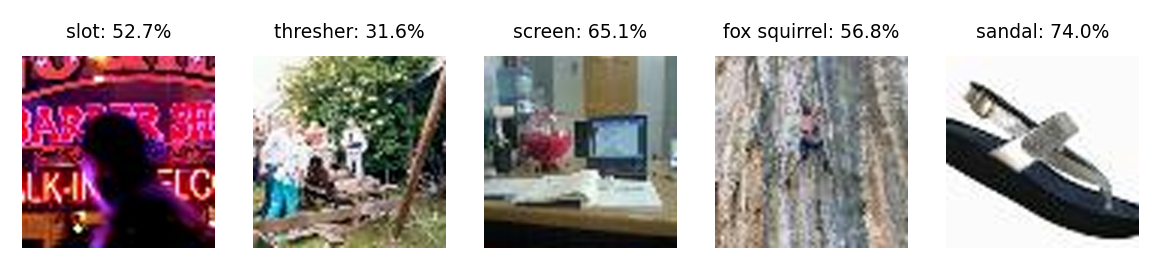

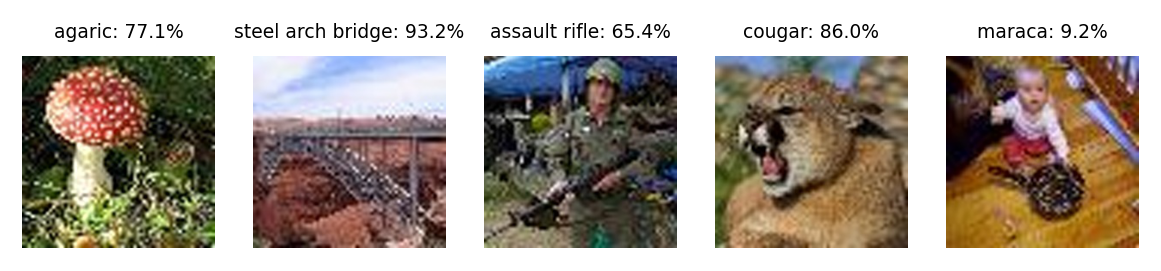

In [132]:
train_prediction = np.array(train_prediction)
print(train_prediction.shape)

trainset1 = np.array(trainset1)
print(trainset.shape)

test_prediction = np.array(test_prediction)
print(test_prediction.shape)

testset = np.array(testset)
print(testset.shape)


f, axarr = plt.subplots(1, 5)
f.dpi = 225

# index = rng.integers(low=0, high=TRAIN_SIZE, size=5)
index = [0,1,2,3,4,5]
for i in range(5):
    axarr[i].set_title(train_labels[index[i]], fontsize = 6)
    axarr[i].axis("off")
    axarr[i].imshow(trainset[index[i]])

plt.show()



f, axarr = plt.subplots(1, 5)
f.dpi = 225

# index = rng.integers(low=0, high=TEST_SIZE, size=5)
index = [0,1,2,3,4,5]
for i in range(5):
    axarr[i].set_title(test_labels[index[i]], fontsize = 6)
    axarr[i].axis("off")
    axarr[i].imshow(testset[index[i]])

plt.show()

In [133]:
print(trainset1[0])
print("My code: ")
print(trainset[0])

[[[ 97   7  56]
  [ 92   5  53]
  [ 83   5  48]
  ...
  [ 95  13  47]
  [ 90   5  42]
  [ 88   3  39]]

 [[104  14  63]
  [101  12  61]
  [ 92  10  54]
  ...
  [ 94  14  47]
  [ 88   8  41]
  [ 86   5  41]]

 [[127  35  86]
  [123  34  82]
  [114  27  73]
  ...
  [ 96  20  52]
  [ 91  17  48]
  [ 90  16  47]]

 ...

 [[  0   2   5]
  [  0   2   5]
  [  0   2   5]
  ...
  [ 25   0   0]
  [ 25   0   0]
  [ 25   0   0]]

 [[  0   3   7]
  [  0   3   7]
  [  0   2   7]
  ...
  [ 26   0   1]
  [ 28   0   1]
  [ 28   0   1]]

 [[  0   3   7]
  [  0   3   7]
  [  0   2   7]
  ...
  [ 28   0   1]
  [ 28   0   1]
  [ 29   0   1]]]
My code: 
[[[ 97   7  56]
  [ 92   5  53]
  [ 83   5  48]
  ...
  [ 95  13  47]
  [ 90   5  42]
  [ 88   3  39]]

 [[104  14  63]
  [101  12  61]
  [ 92  10  54]
  ...
  [ 94  14  47]
  [ 88   8  41]
  [ 86   5  41]]

 [[127  35  86]
  [123  34  82]
  [114  27  73]
  ...
  [ 96  20  52]
  [ 91  17  48]
  [ 90  16  47]]

 ...

 [[  0   2   5]
  [  0   2   5]
  [  0   2